<a href="https://colab.research.google.com/github/leewoo0614/dataai/blob/master/MidTermPart1_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 1 - What's your pet

MidTerm Part 1: Write your answers in this notebook and submit it to your github. This notebook is not complete, and you need to fill it to make it work. You may need to read the manual for some functions and classes.

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller *batch size* (you'll learn all about what this means during the course), and try again.

In [ ]:
bs = 64

## Looking at the data

We are going to use the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) which features 12 cat breeds and 25 dogs breeds. Our model will need to learn to differentiate between these 37 distinct categories. 

We are going to use the `untar_data` function to which we must pass a URL as an argument and which will download and extract the data.

In [ ]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False, verbose=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [ ]:
path = untar_data(URLs.PETS); 
# Question 1. 1.1) What is the value of variable URLs.PETS?
# A 1.1 : https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet
# 1.2) From which package would URLs.PETS have been imported?
# A 1.2 : fastai.datasets
# 1.3) To which folder in your remote colab machine is the content of URLs.PETS downloaded?
# A 1.3 : '/root/.fastai/data/oxford-iiit-pet'
# 1.4) What are the contents of this folder?
# A 1.4 :images of the pet dataset of oxford

PosixPath('/root/.fastai/data/oxford-iiit-pet')

The first thing we do when we approach a problem is to take a look at the data. We _always_ need to understand very well what the problem is and what the data looks like before we can figure out how to solve it. Taking a look at the data means understanding how the data directories are structured, what the labels are and what some sample images look like.


In [ ]:
path_img = path/'images'
fnames = get_image_files(path_img)
fnames[:10]
# Question 2. 2.1) Show me the names of 10 image files from the folder to which the image files were downloaded.
# Use function get_image_files() to do this.
# A 2.1 : [PosixPath('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_161.jpg'),
 #PosixPath('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_65.jpg'),
 #PosixPath('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_75.jpg'),
 #PosixPath('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_148.jpg'),
 #PosixPath('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_90.jpg'),
 #PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_250.jpg'),
 #PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_59.jpg'),
 #PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_63.jpg'),
 #PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_155.jpg'),
 #PosixPath('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_73.jpg')]

# 2.2) Having see the names of the image files, can you guess what the name of each
# image file represent?
# A 2.2 : for example, great_pyrenees_161.jpg means this is a picture of great pyrenees, and 161 is identify number between great pyrenees picture.

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_161.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_65.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_75.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_148.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_90.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_250.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_59.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_63.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_155.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_73.jpg')]

In [ ]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [ ]:
dataBunch = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)
# Question 3. 3.1) Use function from_name_re of class ImageDataBunch to create a "dataBunch".
# The dataBunch contains information about the size of the batch, the images to be used for training
# the neural network and their labels, the images to be used for validating the neural network and their labels.
                 
                                

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

In [ ]:
dataBunch
# Question 4. Please answer the following questions about the created dataBunch: 
# 4.1) How many image items does the Train dataset contain?
# A 4.1 : 5912 items
# 4.2) How many category items does the Train dataset contain?
# A 4.2 : 5912 tiems
# 4.3) How many image items does the Validation dataset contain?
# A 4.3 : 1478 items
# 4.4) How many category items does the Validation dataset contain?
# A 4.4 : 1478 items

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
great_pyrenees,basset_hound,shiba_inu,Sphynx,english_cocker_spaniel
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Siamese,Birman,leonberger,shiba_inu,Abyssinian
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

37

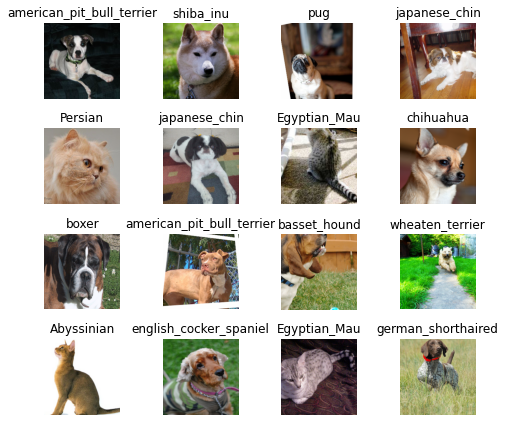

In [ ]:
 # Question 5. 5.1) Show me 10 data items from the created dataBunch?
dataBunch.show_batch(rows=4, figsize=(7,6))
 # 5.2) Show the number of classes in the dataBunch by executing an appropriate method of dataBunch object?
len(dataBunch.classes)
# A 5.2 : 37

## Training: resnet34

Now we will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier. Specifically, we will use reset34. We are in fact building a function which will take an image as input and will compute an output for the input. 

Question 6. What kind of information does this output represent?


In [ ]:
learner = cnn_learner(dataBunch, models.resnet34, metrics=error_rate)
# Question 7: We use function cnn_learner() to create an object that will learn a neural network
# by feeding dataBunch to the pretrained resnet34.

# 7.1) From which package was "models" imported?
# 
# models.resent34 is a pretained neural network, that is, the neural network that is 
# already trained by using one and half a million images and thousands of categories. 
# We are going to train the new neural network  by using less than
# 10000 dog and cat images and 37 categories. That is, we are going to retrain the
# pretrained neural network "resnet34" by using few dogs and cats images (less than 1 % of the 
# dataset used to train the original pretrained neural network). 
# This neural network is supposed to classify new types of images, i.e. dogs and cats better than the original
# resnet34. 

# In the following, the neural network "freezes" the much of the neural network "reset34" and retain
# only a tiny part of it using the new dataset. This process is called "learning transfer".
# 
# A 7.1 : <module 'fastai.vision.models' from '/usr/local/lib/python3.6/dist-packages/fastai/vision/models/__init__.py'>
#
# 7.2) Tell me which part of the resnet34 is re-trained and which part of it remains to be fixed?
# To answer this question, refer:
# the first figure in this site: https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53
# # https://blog.roboflow.com/how-to-train-a-custom-resnet34-model/. 
# and picture "34 layers residual" in https://blog.roboflow.com/custom-resnet34-classification-model/ .

# A 7.2 : the last layer gonna be re-trained and something else will remain fixed.

# 7.3) Please tell me why this learning transfer would work? 
# A 7.3 : resnet is pre-trained to cover thousands of categories, so we transfer the model to ours. the model is good at classify things already, 
#         so we only need to re-train the last layer to distinguish breeds of cats and dogs


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
# Question 8: (8.1) Please re-train the neural network for 5 epochs.
learner.model
learner.fit_one_cycle(5)
# (8.2) For each epoch, it will show the train_loss and the validation_loss. 
# Explain how these losses are computed. 
# A 8.2 : loss function is about how many difference between the model and correct answer. 
#          train loss is about the train dataset, and validation loss is about the validation dataset.
# 
# (8.3) Tell me how the train_loss and the validation_loss change as the epoch progresses.
# A 8.3 : train_loss and validation_loss is decreasing over epoch. 

# (8.4) Tell me how "error_rate" would be computed? 
# You need to refer to what kind of data is used to compute the error-rate.
# A 8.4 : error rate refers from the number of data and number of wrong guessed data. number of wrong guessed data/number of data is the error rate.

# (8.5) Would you increase the number of epochs or decrease it to get a better result?
# A 8.5 : we need to adjust the number of epochs not too many, as well as not too small. 
#         as we increase the number of epochs, it will train more and accuracy will go up, 
#         but if we do that too far, the model will overfit to the train dataset. 
#         which means if the model sense a small different to training set, will not distinguish as the correct one.
 

epoch,train_loss,valid_loss,error_rate,time
0,1.521717,0.347747,0.119756,01:28
1,0.654222,0.293313,0.098106,01:29
2,0.438346,0.265519,0.093369,01:29
3,0.299547,0.237294,0.078484,01:31
4,0.230458,0.232692,0.079838,01:32


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

## Results

Let's see what results we have got. 

See  which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly. 

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

In [ ]:
interpretation = ClassificationInterpretation.from_learner(learner)

losses,indices = interpretation.top_losses()
# QUestion 9. 
# 9.1) Please show the first 10 values of losses and indices, and explain  they represent?
losses[:10]
indices[:10]
# A: 9.1 : tensor([1295,  973,  518,  812,  676,  861,  517,  342,  478, 1062])

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

tensor([1295,  973,  518,  812,  676,  861,  517,  342,  478, 1062])

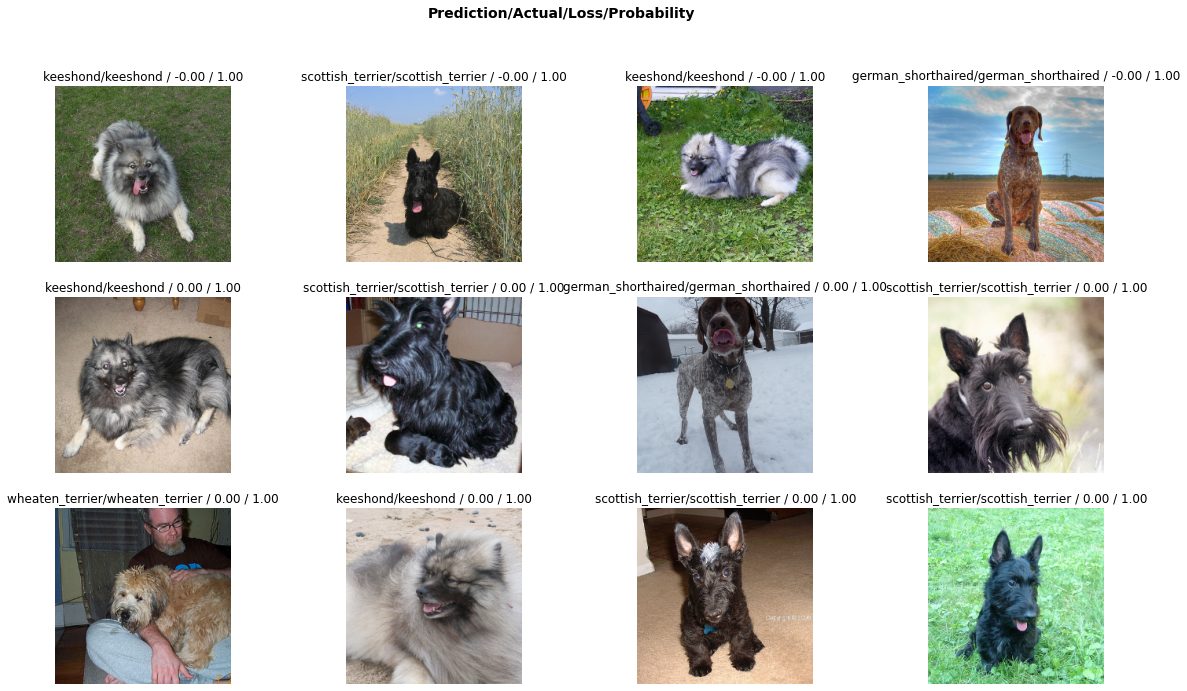

In [ ]:
# interpretation.plot_top_losses(12, largest=True, figsize=(20,11))
# Question 10. 10.1) Use the above function to see the result of classification for the validation dataset. 
# Please explain the meaning of the first item and the meaning of the 12th item.
# A 10.1 : first item(keeshond/leonberger/7.35/0.00)   12th(Maine_Coon/shiba_inu/4.96/0.01)
# first one is picture of leonburger and the model predicted as keeshond. 7.35 is rate about the model mispredicted leonburger as keeshond. and the last 0.00 is how much the model think it as leonburger.
# last one is picture of shiba inu and the model predicted as maine coon. 4.96 is rate about the model mispredicted shiba inu as maine coon. and the last 0.01 is how much the model think it as maine coon.
# 10.2) execute interp.plot_top_losses(12, largest=False, figsize=(20,11))
# Explain the meaning of the 12th item.
interpretation.plot_top_losses(12, largest=False, figsize=(20,11))
#last item is scottish_terrier/scottish_terrier/0.00/1.00. the model predicted all scottish terrier correctly. the model thinks the last picture is 100% sure scottish terrier.


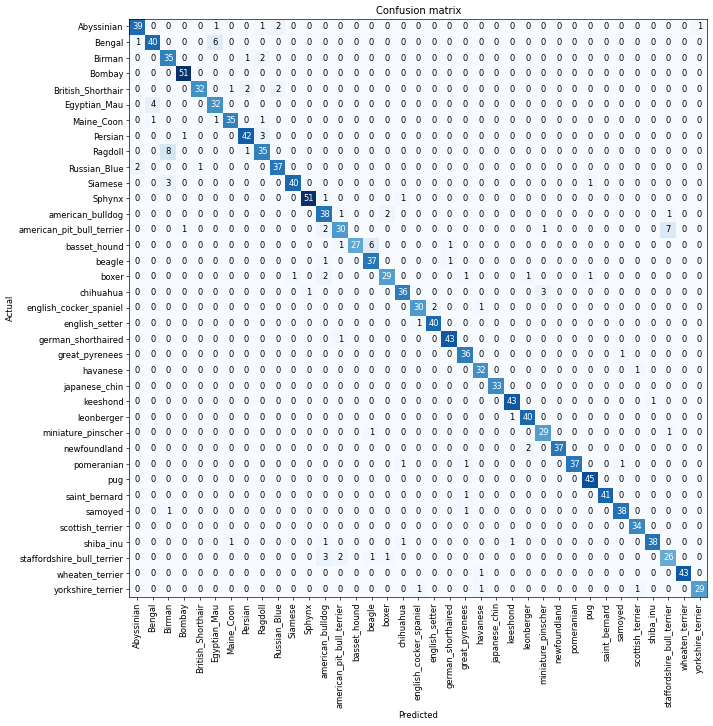

In [ ]:
interpretation.plot_confusion_matrix(figsize=(12,12), dpi=60)
# Question 11: 11.1) It will show the 37 x 37 matrix. What does the row of 
#  "american_pit_bull_terrier" tell you about the capability of this neural network?
# A 11.1 : the model predicted 30 out of 35 pitbull terrier correctly. the model is well trained, and with more train it can be useful in real life.